In [30]:
import os
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

In [28]:
evts_path = '/Users/romoluque_c/LEGEND/BACON/data_npz/'

useful_channels = 8

peak_heigh_all_channels   = [[] for i in range(useful_channels)]
peak_area_all_channels    = [[] for i in range(useful_channels)]
peak_area_zs_all_channels = [[] for i in range(useful_channels)]

chann8 = 0
chann7 = 0
for filename in os.listdir(evts_path):
    if filename.endswith('.npz'):
        #print(filename)
        try:
            my_file = evts_path+filename
            d = np.load(my_file, allow_pickle=True)
    
            #print(len(d['peak_heigh_all_channels']))
            if len(d['peak_heigh_all_channels'])==8:
                chann8 += 1
            else:
                chann7 += 1
                print(filename)
            #print(len(d['peak_area_all_channels']))
            #print(len(d['peak_area_zs_all_channels']))
            
            #print(len(peak_heigh_all_channels), len(peak_area_all_channels), len(peak_area_zs_all_channels))
            for channel in range(useful_channels):
                peak_heigh_all_channels  [channel] = np.concatenate((peak_heigh_all_channels  [channel], d['peak_heigh_all_channels']  [channel]))
                peak_area_all_channels   [channel] = np.concatenate((peak_area_all_channels   [channel], d['peak_area_all_channels']   [channel]))
                peak_area_zs_all_channels[channel] = np.concatenate((peak_area_zs_all_channels[channel], d['peak_area_zs_all_channels'][channel]))
        except IndexError:
            continue

bacon_peak_height_and_area_run-07_06_2023-file_8.npz
bacon_peak_height_and_area_run-07_07_2023-file_42.npz
bacon_peak_height_and_area_run-07_06_2023-file_20.npz
bacon_peak_height_and_area_run-07_06_2023-file_21.npz
bacon_peak_height_and_area_run-07_07_2023-file_43.npz
bacon_peak_height_and_area_run-07_06_2023-file_9.npz
bacon_peak_height_and_area_run-07_07_2023-file_41.npz
bacon_peak_height_and_area_run-07_06_2023-file_23.npz
bacon_peak_height_and_area_run-07_06_2023-file_22.npz
bacon_peak_height_and_area_run-07_07_2023-file_40.npz
bacon_peak_height_and_area_run-07_06_2023-file_26.npz
bacon_peak_height_and_area_run-07_06_2023-file_27.npz
bacon_peak_height_and_area_run-07_06_2023-file_25.npz
bacon_peak_height_and_area_run-07_06_2023-file_19.npz
bacon_peak_height_and_area_run-07_06_2023-file_18.npz
bacon_peak_height_and_area_run-07_06_2023-file_24.npz
bacon_peak_height_and_area_run-07_07_2023-file_21.npz
bacon_peak_height_and_area_run-07_07_2023-file_35.npz
bacon_peak_height_and_area_run

In [29]:
chann7, chann8

(77, 299)

In [3]:
peak_heigh_all_channels

array([array([ 56.,  57.,  53., ...,  55.,  67., 147.]),
       array([264.,  56., 160., ...,  57., 335., 149.]),
       array([ 55., 256., 143., ...,  58., 311., 148.]),
       array([ 53.,  58.,  52., ..., 258., 502.,  54.]),
       array([155.,  53.,  56., ...,  56.,  54., 132.], dtype=float32),
       array([54., 56., 52., ..., 58., 51., 55.]),
       array([ 56.,  53.,  58., ..., 215., 469.,  51.]),
       array([712.,  66.,  72., ...,  65.,  73.,  65.], dtype=float32)],
      dtype=object)

In [63]:
evts_path = '/Users/romoluque_c/LEGEND/BACON/data_npz/'

all_channels = 9

peak_heigh_all_channels_dict   = {}
peak_area_all_channels_dict    = {}
peak_area_zs_all_channels_dict = {}

def get_date(filename):
    date_str = filename[31:41]
    date = datetime.strptime(date_str, '%m_%d_%Y')
    return date

files        = os.listdir(evts_path)
sorted_files = sorted(files, key=get_date)

for filename in sorted_files:
    my_file = evts_path+filename
    d = np.load(my_file, allow_pickle=True)
    
    date = filename[31:41]
    
    if date not in peak_heigh_all_channels_dict:
        peak_heigh_all_channels   = [np.array([]) for _ in range(all_channels)]
        peak_area_all_channels    = [np.array([]) for _ in range(all_channels)]
        peak_area_zs_all_channels = [np.array([]) for _ in range(all_channels)]

    for channel in range(all_channels):
        if channel==3:
            continue
        if len(d['peak_heigh_all_channels'])<8:
            if channel==7:
                continue
            elif channel>7:
                peak_heigh_all_channels  [channel] = np.concatenate((peak_heigh_all_channels  [channel], d['peak_heigh_all_channels']  [channel-2]))
                peak_area_all_channels   [channel] = np.concatenate((peak_area_all_channels   [channel], d['peak_area_all_channels']   [channel-2]))
                peak_area_zs_all_channels[channel] = np.concatenate((peak_area_zs_all_channels[channel], d['peak_area_zs_all_channels'][channel-2]))
                continue
        if channel > 3:
            peak_heigh_all_channels  [channel] = np.concatenate((peak_heigh_all_channels  [channel], d['peak_heigh_all_channels']  [channel-1]))
            peak_area_all_channels   [channel] = np.concatenate((peak_area_all_channels   [channel], d['peak_area_all_channels']   [channel-1]))
            peak_area_zs_all_channels[channel] = np.concatenate((peak_area_zs_all_channels[channel], d['peak_area_zs_all_channels'][channel-1]))
        else:
            peak_heigh_all_channels  [channel] = np.concatenate((peak_heigh_all_channels  [channel], d['peak_heigh_all_channels']  [channel]))
            peak_area_all_channels   [channel] = np.concatenate((peak_area_all_channels   [channel], d['peak_area_all_channels']   [channel]))
            peak_area_zs_all_channels[channel] = np.concatenate((peak_area_zs_all_channels[channel], d['peak_area_zs_all_channels'][channel]))

    peak_heigh_all_channels_dict  [filename[31:41]] = np.array(peak_heigh_all_channels  , dtype=object)
    peak_area_all_channels_dict   [filename[31:41]] = np.array(peak_area_all_channels   , dtype=object)
    peak_area_zs_all_channels_dict[filename[31:41]] = np.array(peak_area_zs_all_channels, dtype=object)

In [60]:
peak_heigh_all_channels_dict

{'05_08_2023': array([array([ 59.,  57.,  57., ...,  66.,  55., 167.]),
        array([139.,  70.,  52., ...,  61., 134., 120.]),
        array([55., 54., 51., ..., 51., 52., 53.]),
        array([], dtype=float64),
        array([663.,  51.,  89., ..., 298., 250., 263.]),
        array([ 61.,  67.,  61., ...,  75.,  52., 316.]),
        array([63., 53., 64., ..., 51., 57., 54.]),
        array([1493.,  240.,   52., ...,  648.,  386.,  450.]),
        array([238.,  51.,  59., ..., 252., 474., 251.])], dtype=object),
 '05_22_2023': array([array([72., 61., 55., ..., 52., 51., 68.]),
        array([53., 58., 52., ..., 52., 56., 55.]),
        array([60., 63., 54., ..., 59., 52., 54.]),
        array([], dtype=float64),
        array([67., 57., 63., ..., 57., 58., 54.]),
        array([57., 66., 64., ..., 66., 62., 52.]),
        array([55., 56., 57., ..., 63., 52., 53.]),
        array([51., 53., 52., ..., 62., 52., 55.]),
        array([51., 52., 61., ..., 56., 52., 55.])], dtype=object)

## Height of the peak

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/2934934634.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


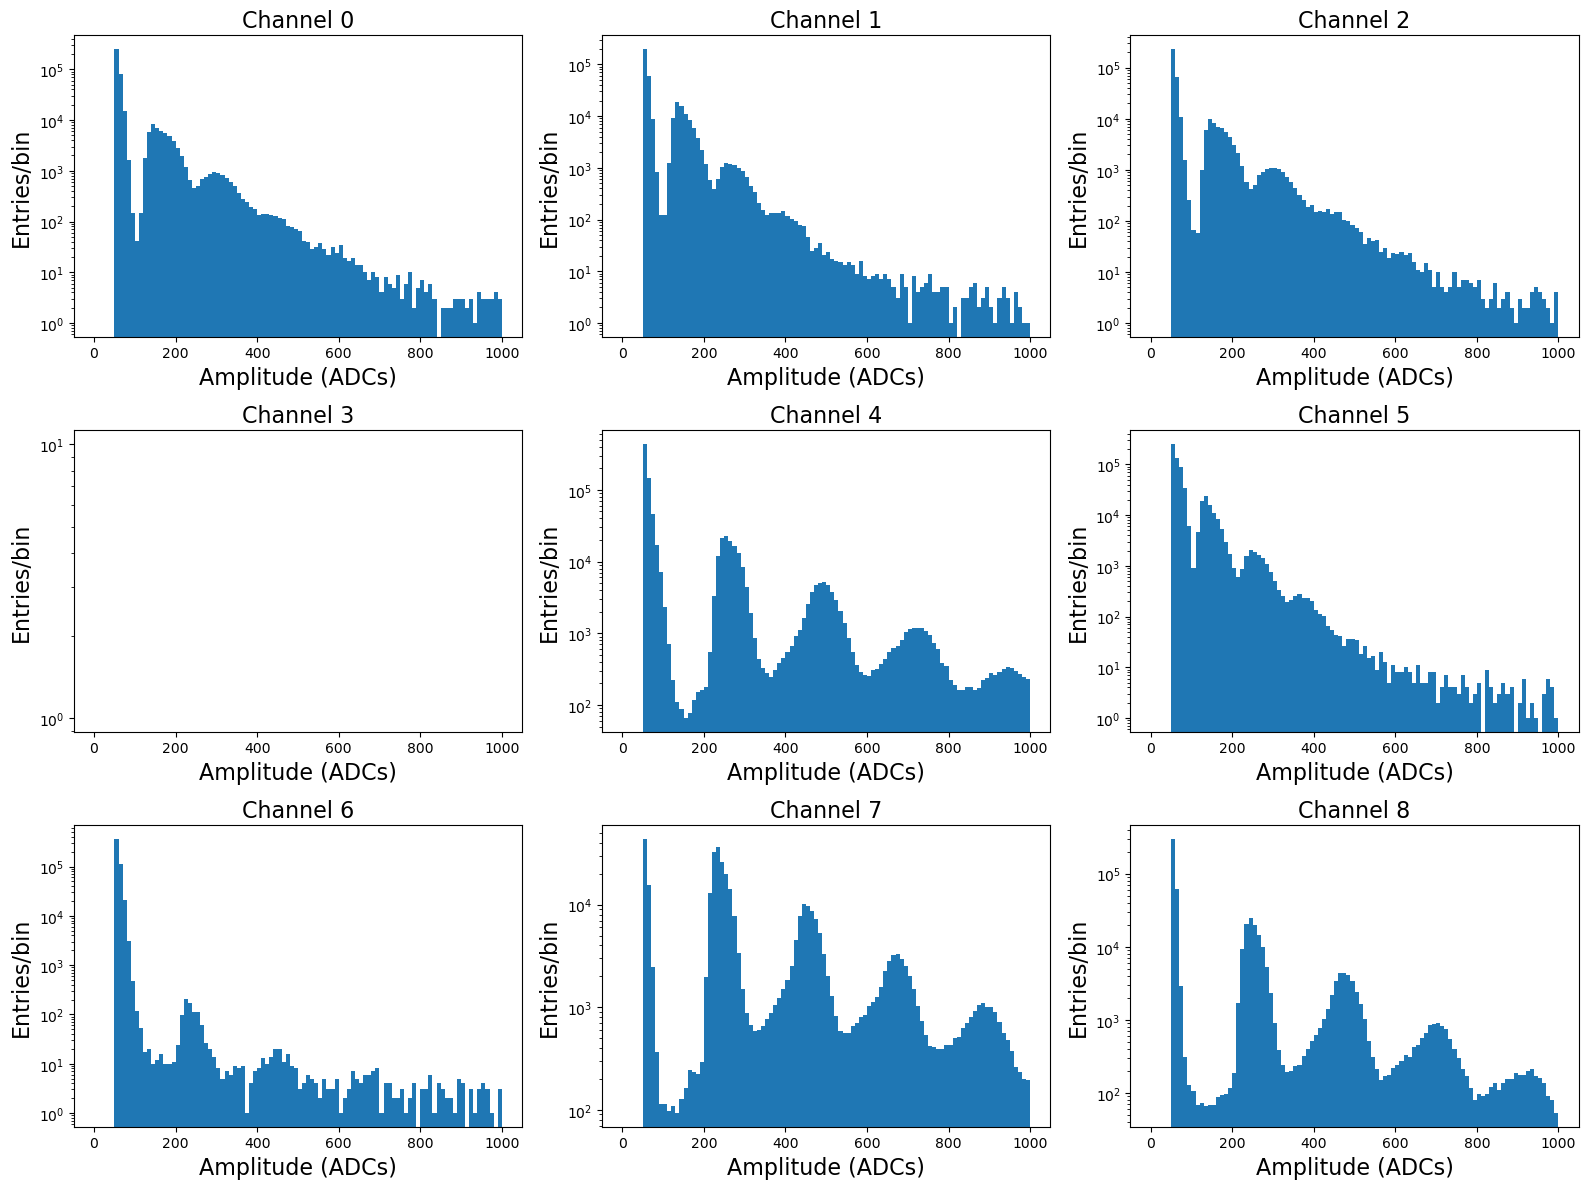

In [79]:
select_date = '05_08_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date][k], bins=100, range=(0,1000), log=True)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/2143996276.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


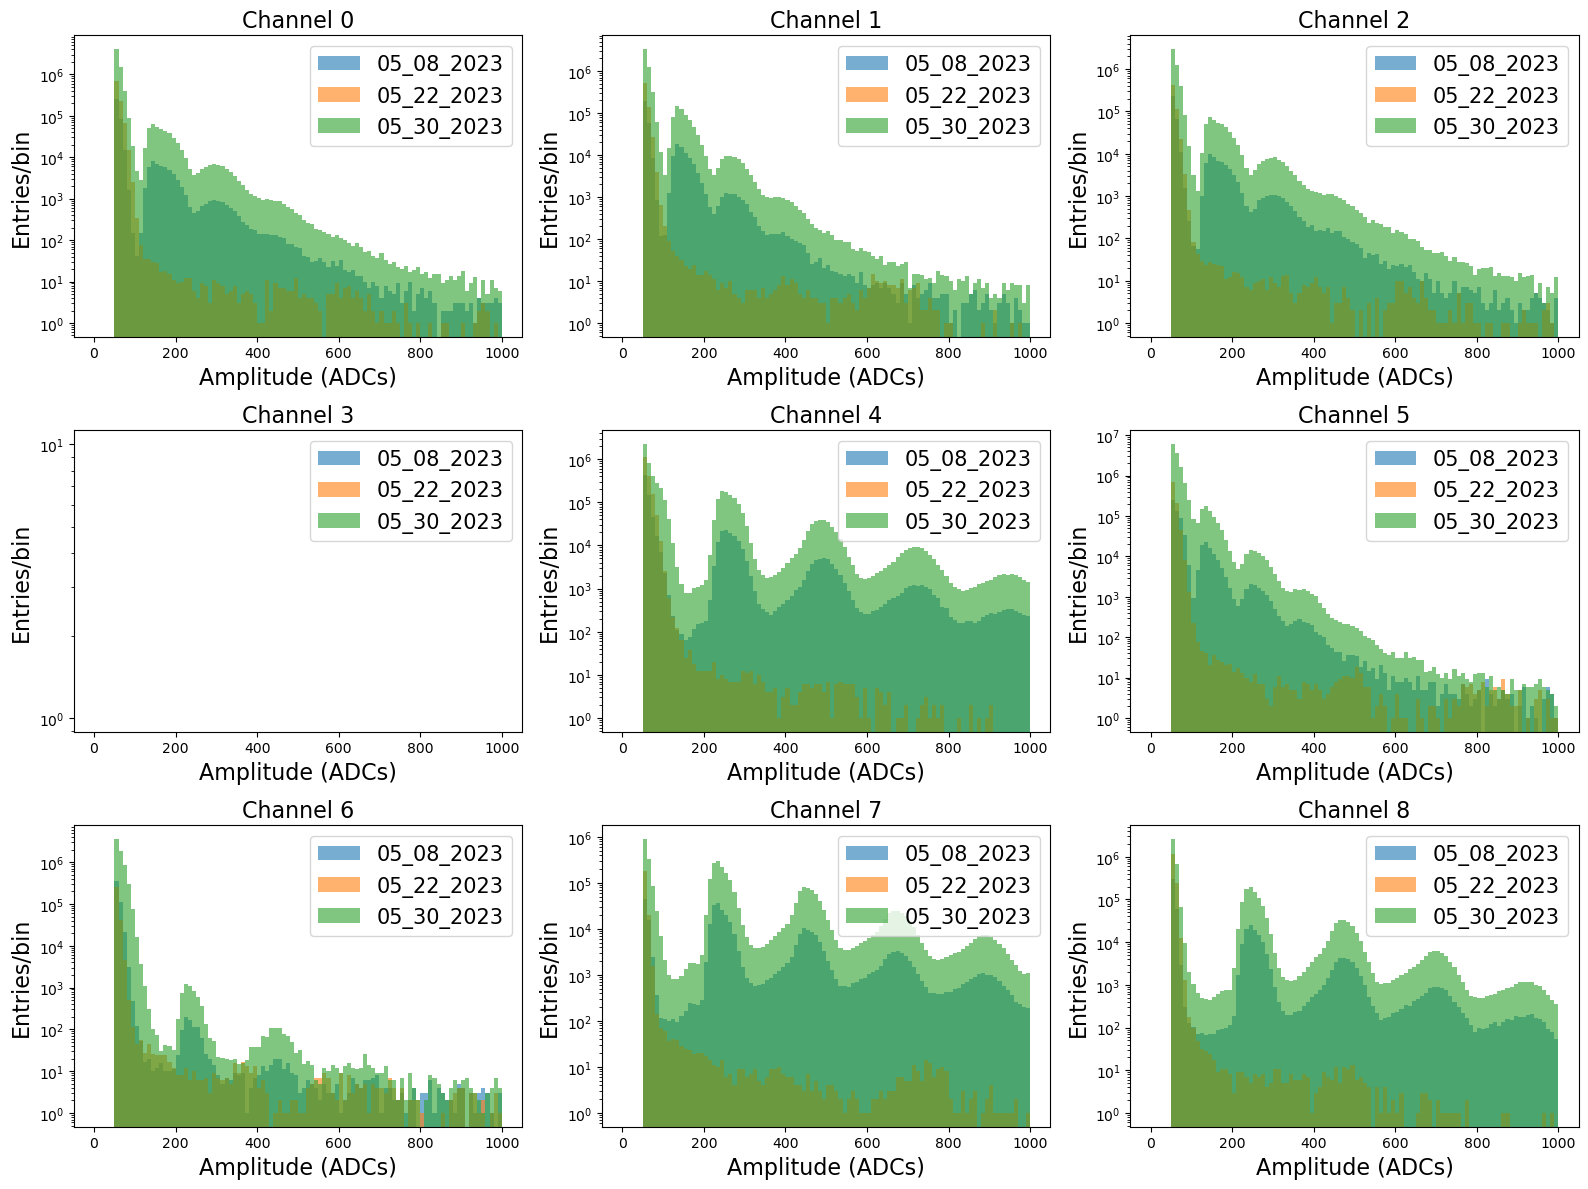

In [80]:
select_date1 = '05_08_2023'
select_date2 = '05_22_2023'
select_date3 = '05_30_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

In [81]:
for k in peak_heigh_all_channels_dict.keys():
    print(k)

05_08_2023
05_22_2023
05_30_2023
06_01_2023
06_02_2023
06_19_2023
06_20_2023
06_21_2023
06_24_2023
07_05_2023
07_06_2023
07_07_2023
07_08_2023


/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/3589290109.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


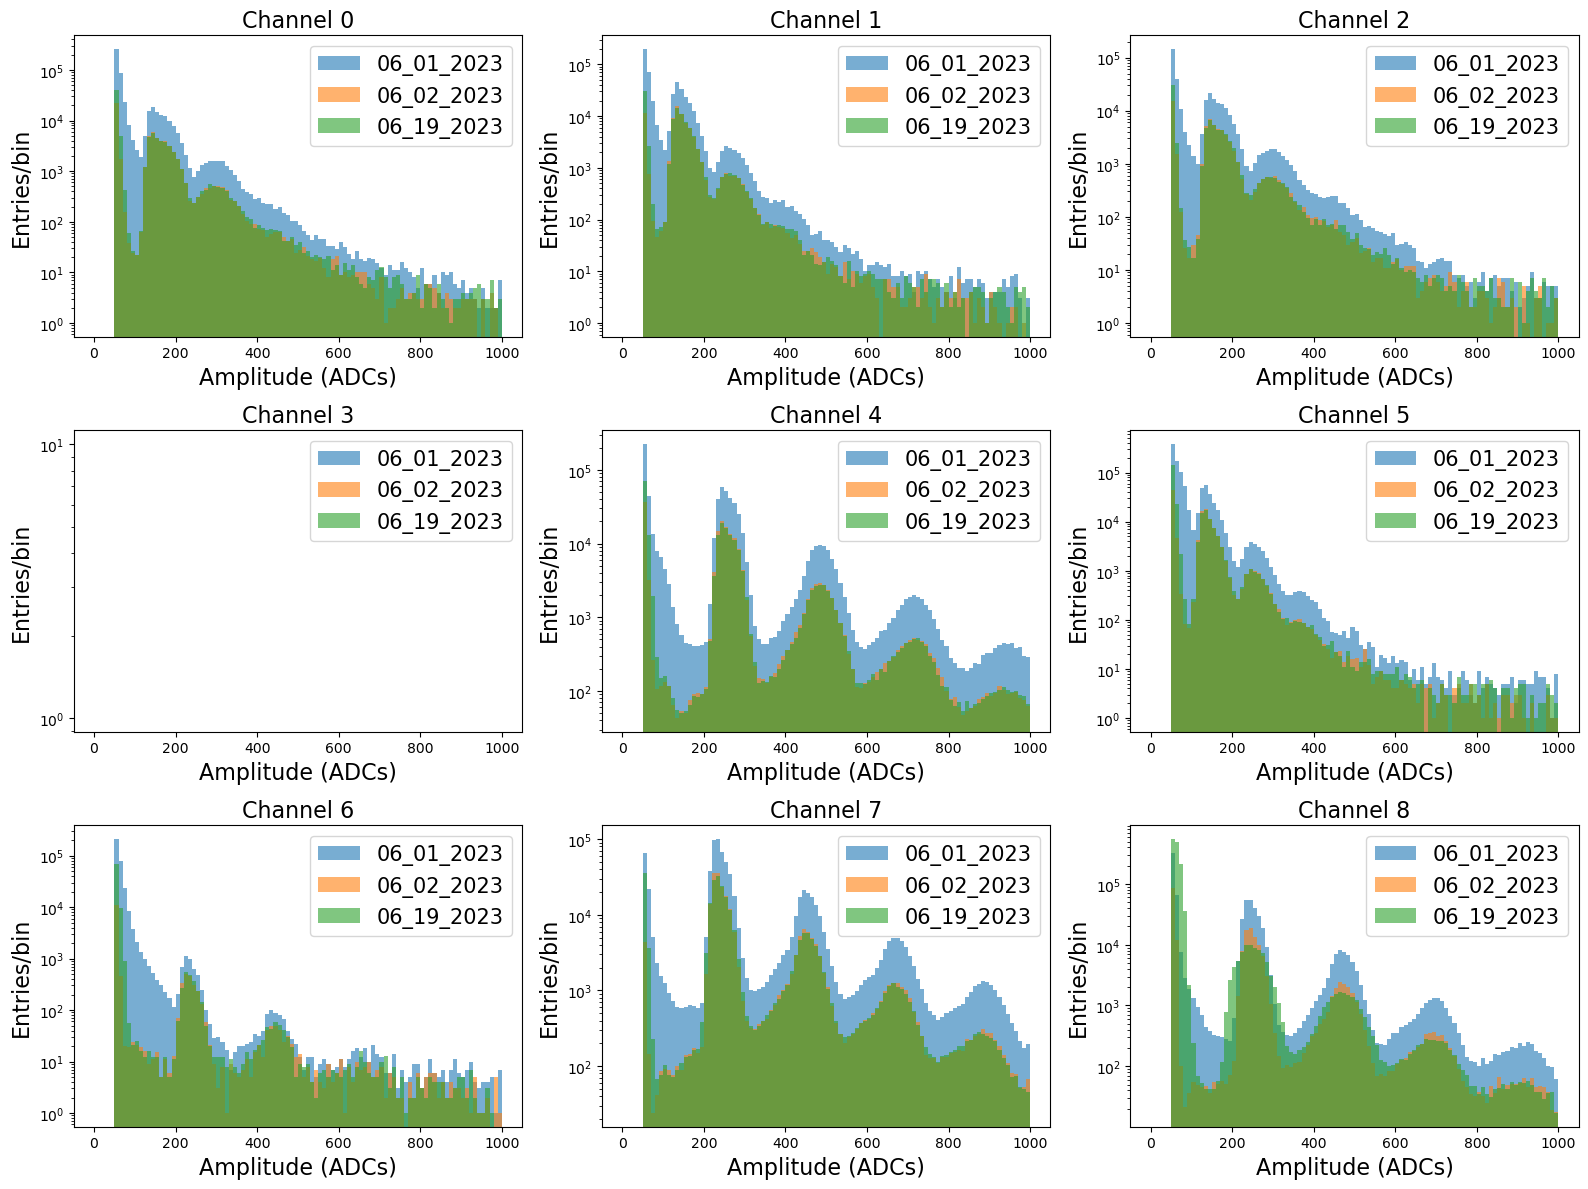

In [82]:
select_date1 = '06_01_2023'
select_date2 = '06_02_2023'
select_date3 = '06_19_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/1159349400.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


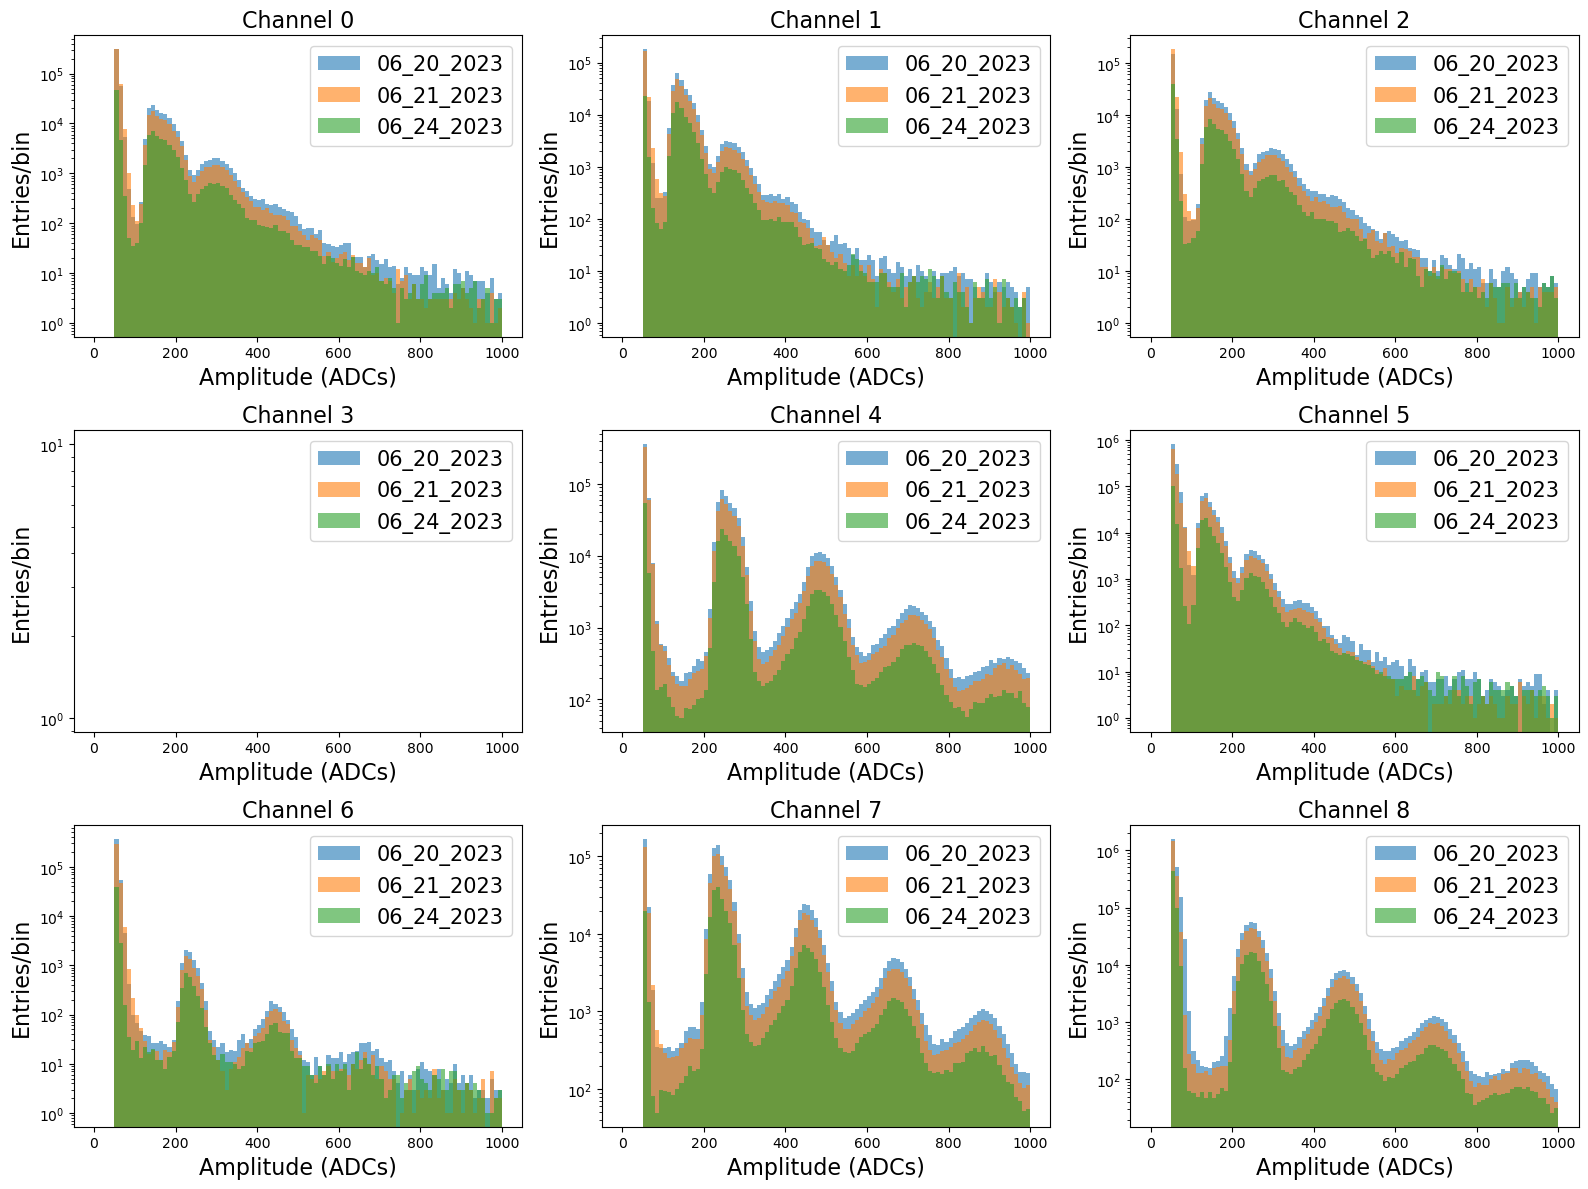

In [83]:
select_date1 = '06_20_2023'
select_date2 = '06_21_2023'
select_date3 = '06_24_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/3416508270.py:22: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


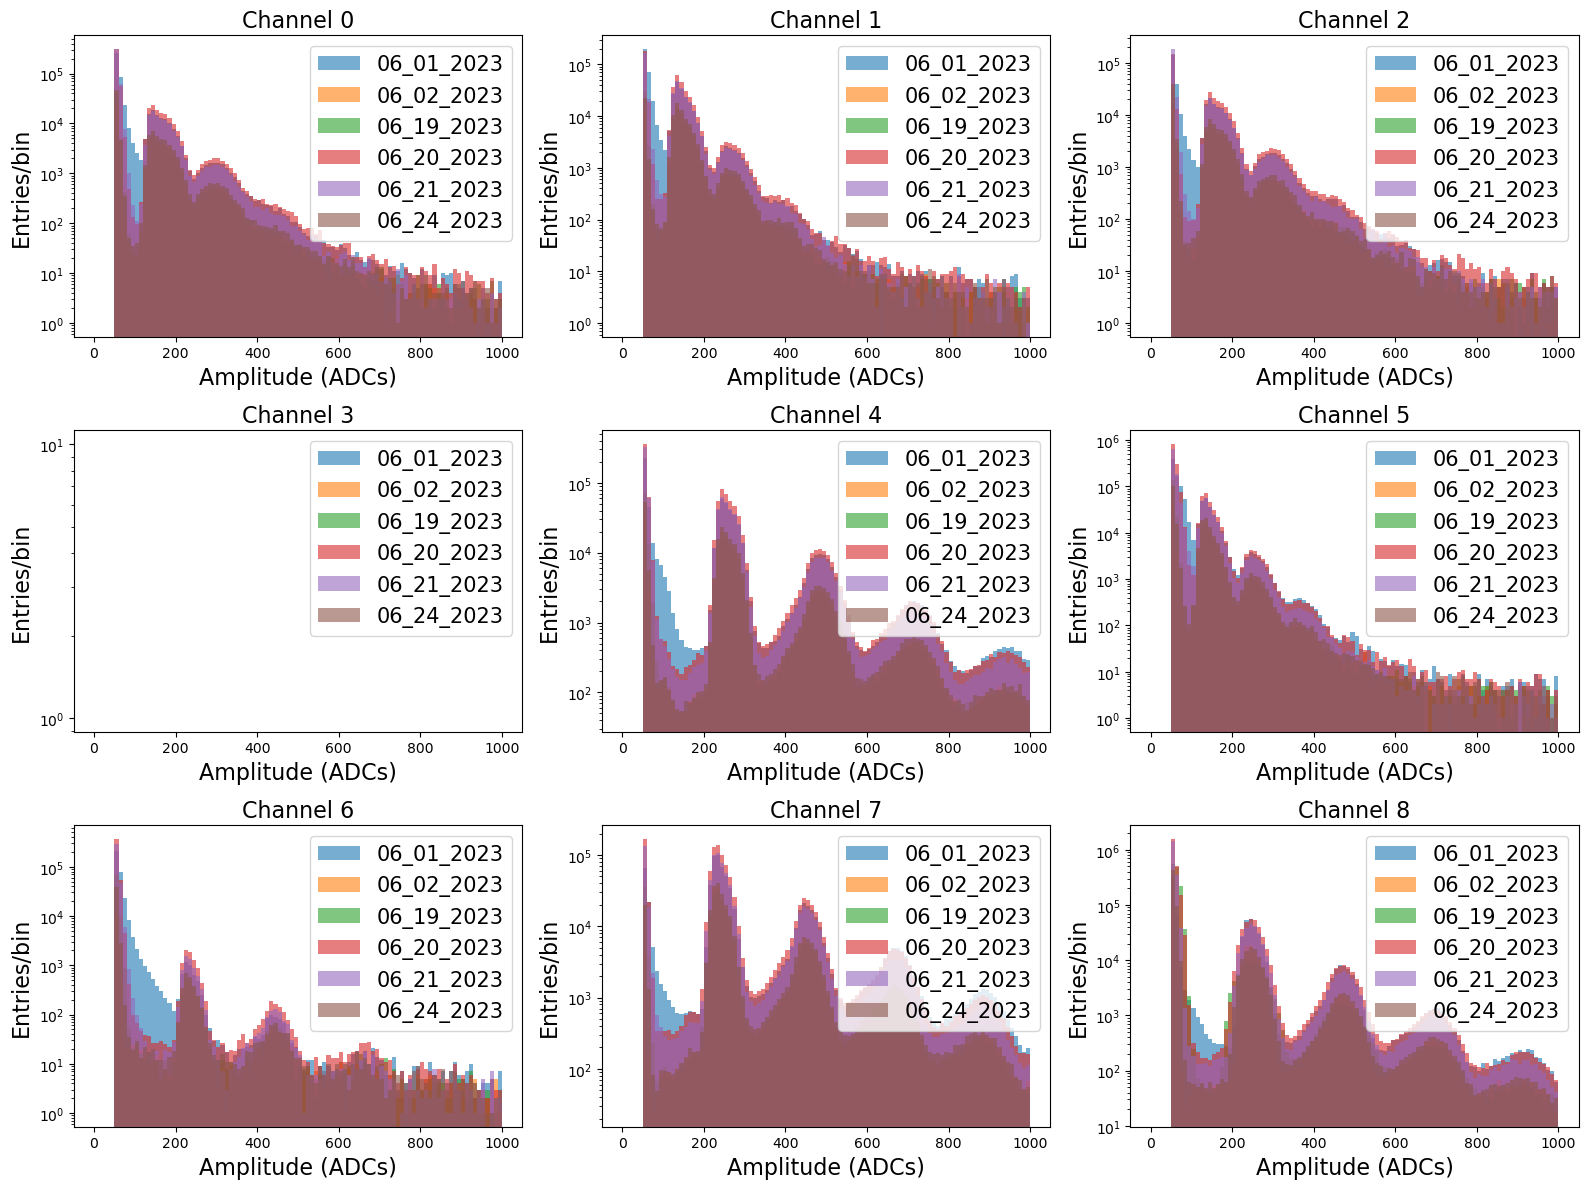

In [84]:
select_date1 = '06_01_2023'
select_date2 = '06_02_2023'
select_date3 = '06_19_2023'
select_date4 = '06_20_2023'
select_date5 = '06_21_2023'
select_date6 = '06_24_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date4][k], bins=100, range=(0,1000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date5][k], bins=100, range=(0,1000), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date6][k], bins=100, range=(0,1000), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/1013516033.py:18: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


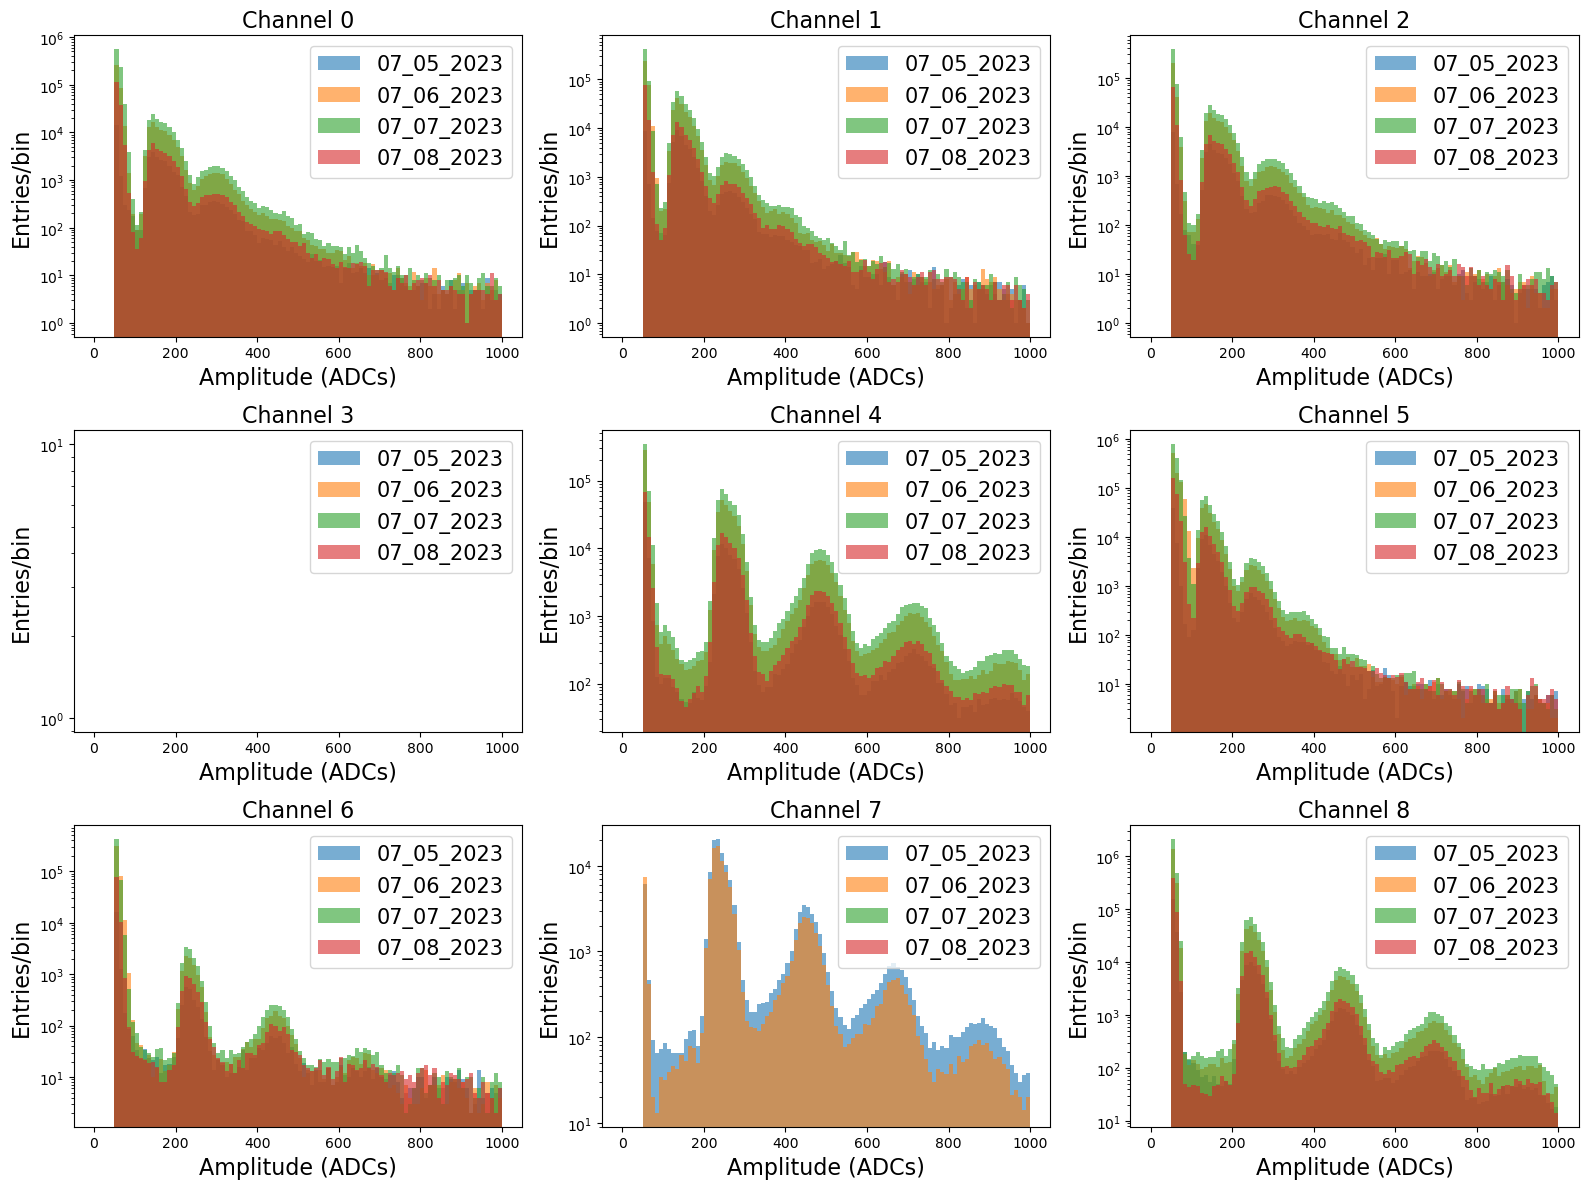

In [85]:
select_date1 = '07_05_2023'
select_date2 = '07_06_2023'
select_date3 = '07_07_2023'
select_date4 = '07_08_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date4][k], bins=100, range=(0,1000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/1836004827.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


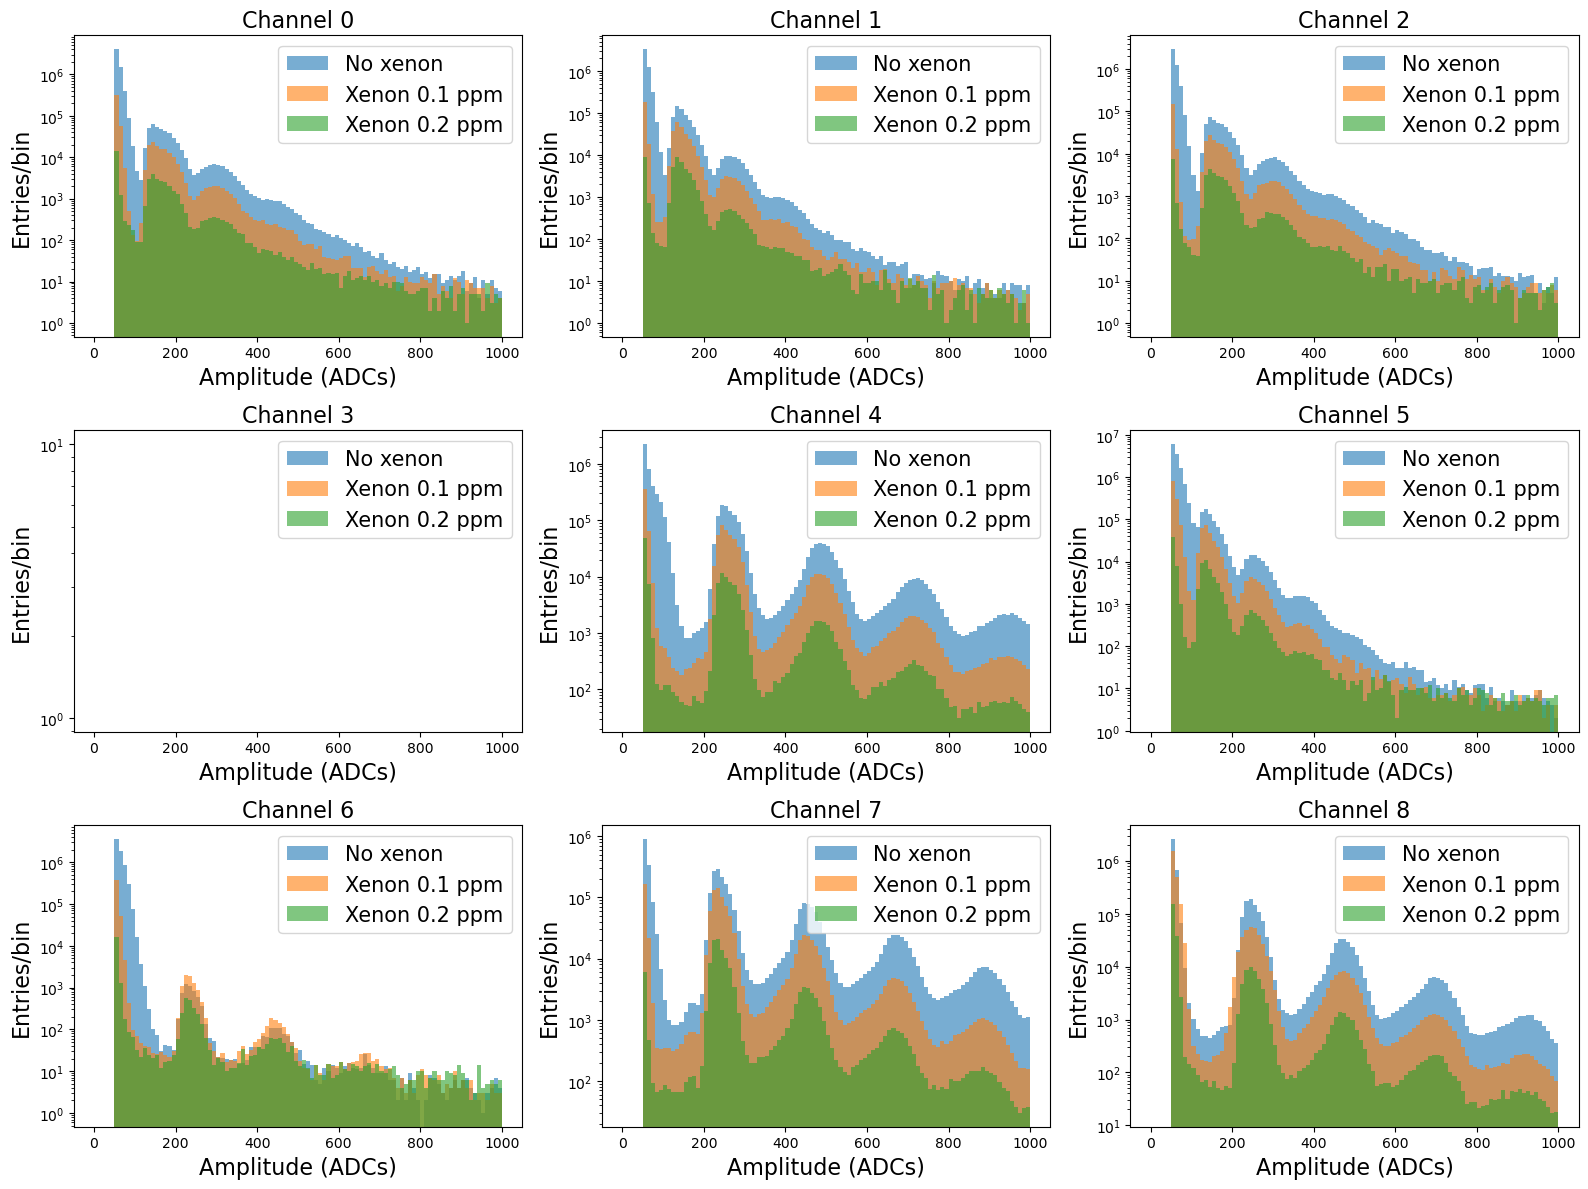

In [86]:
select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_05_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'No xenon', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'Xenon 0.1 ppm', alpha=0.6)
    axs[i][j].hist(peak_heigh_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'Xenon 0.2 ppm', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

### Integration:

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/297928517.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


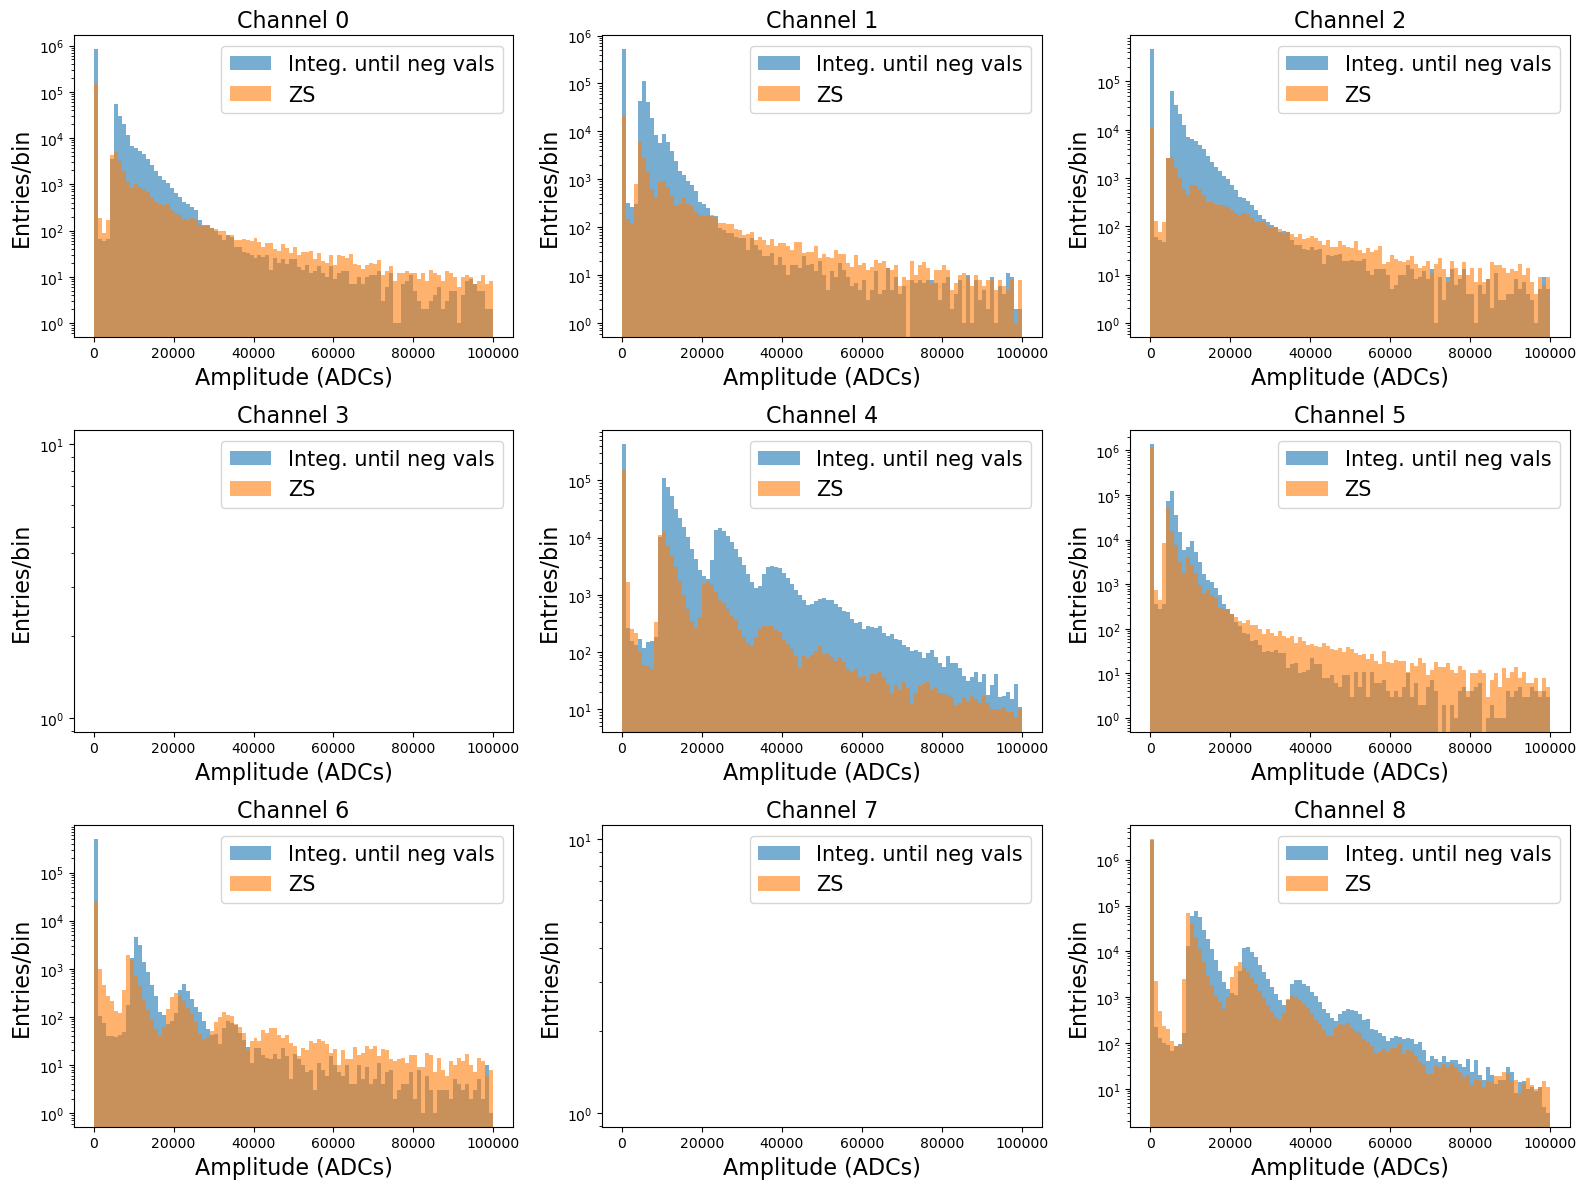

In [78]:
select_date = '07_07_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_all_channels_dict   [select_date][k], bins=100, range=(0, 100000), log=True, alpha=0.6, label='Integ. until neg vals')
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date][k], bins=100, range=(0, 100000), log=True, alpha=0.6, label='ZS')
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/24909324.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


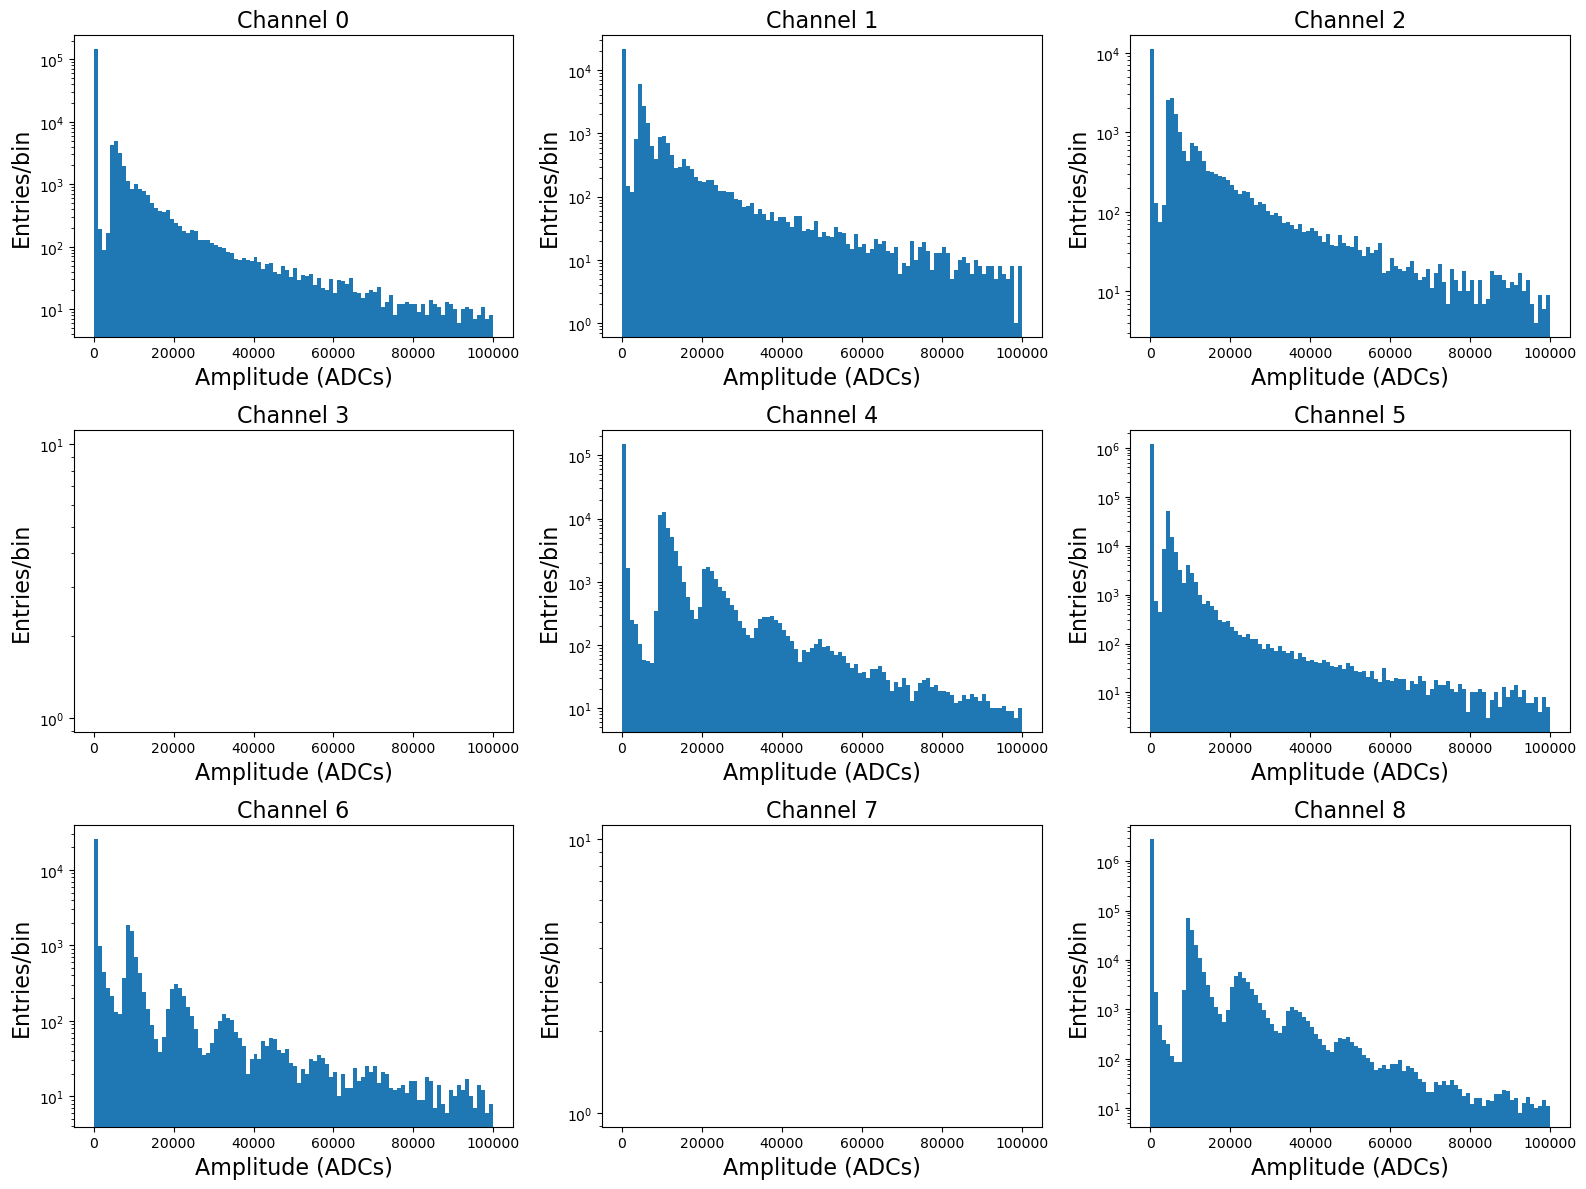

In [74]:
select_date = '07_07_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date][k], bins=100, range=(0, 100000), log=True)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/3565342544.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


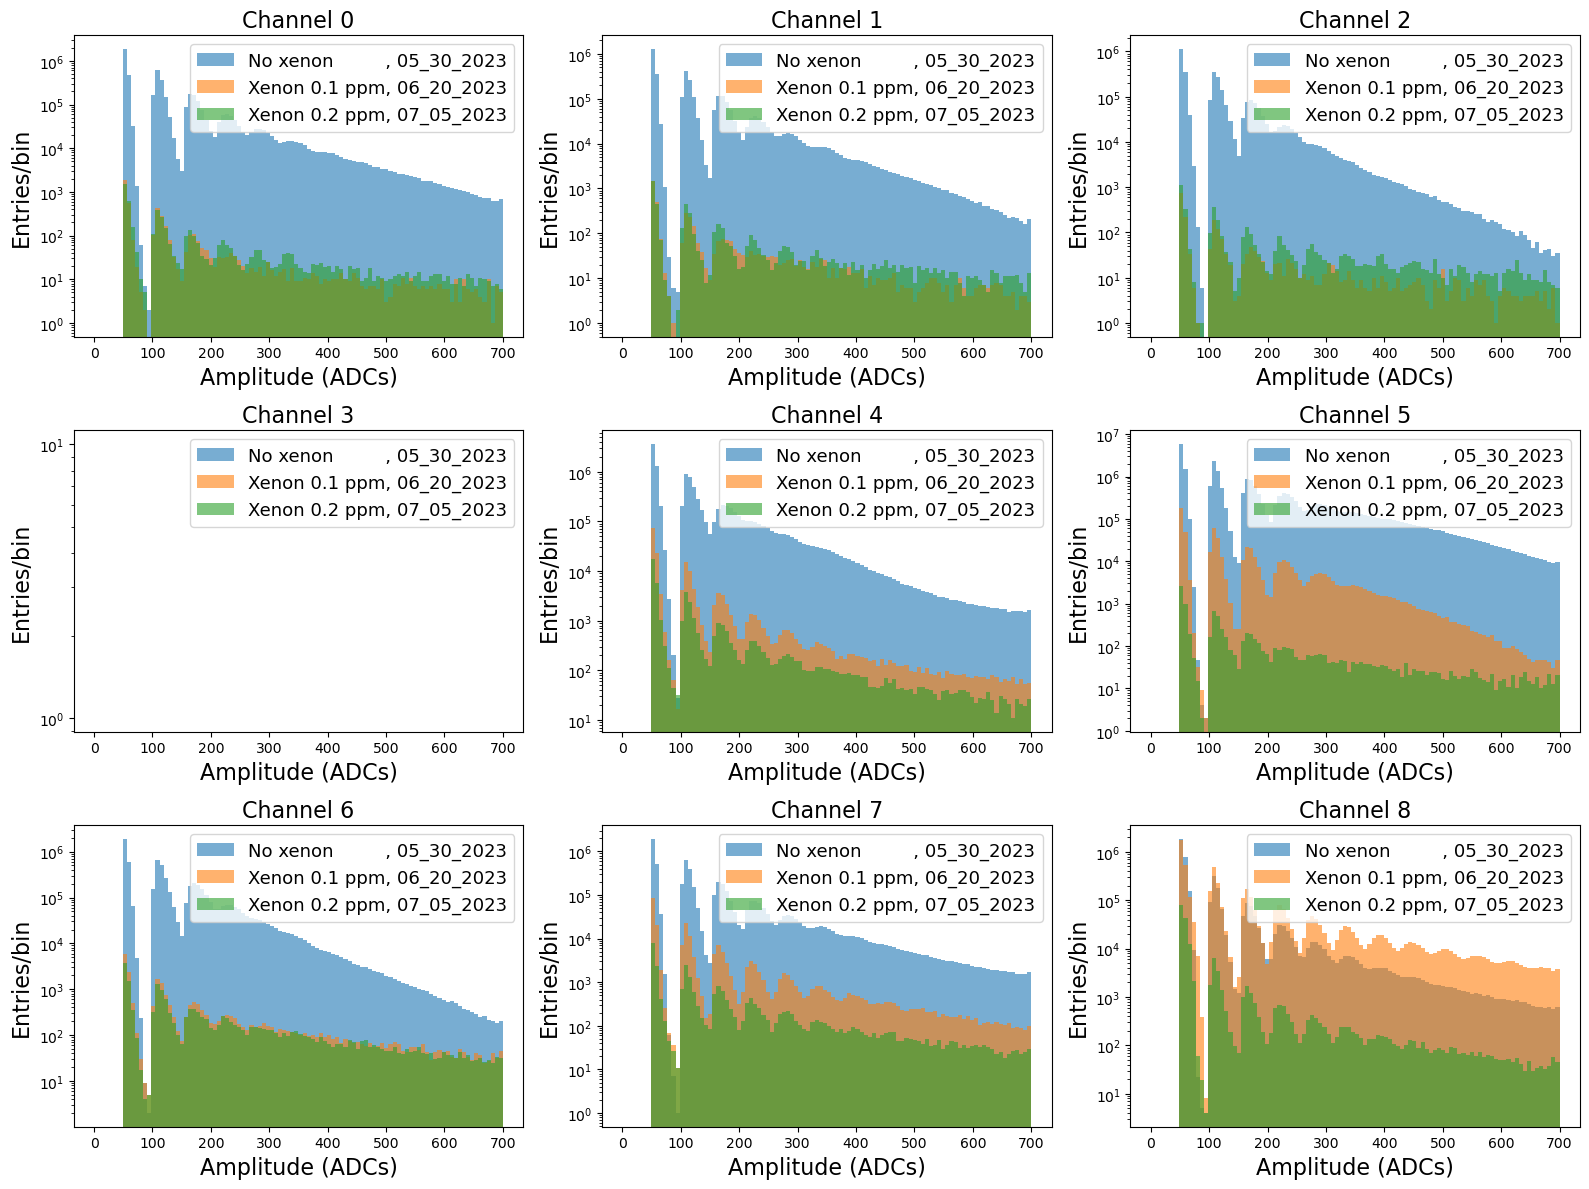

In [95]:
select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_05_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,700), log=True, label=f'No xenon         , {select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,700), log=True, label=f'Xenon 0.1 ppm, {select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,700), log=True, label=f'Xenon 0.2 ppm, {select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=13)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/2032781218.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


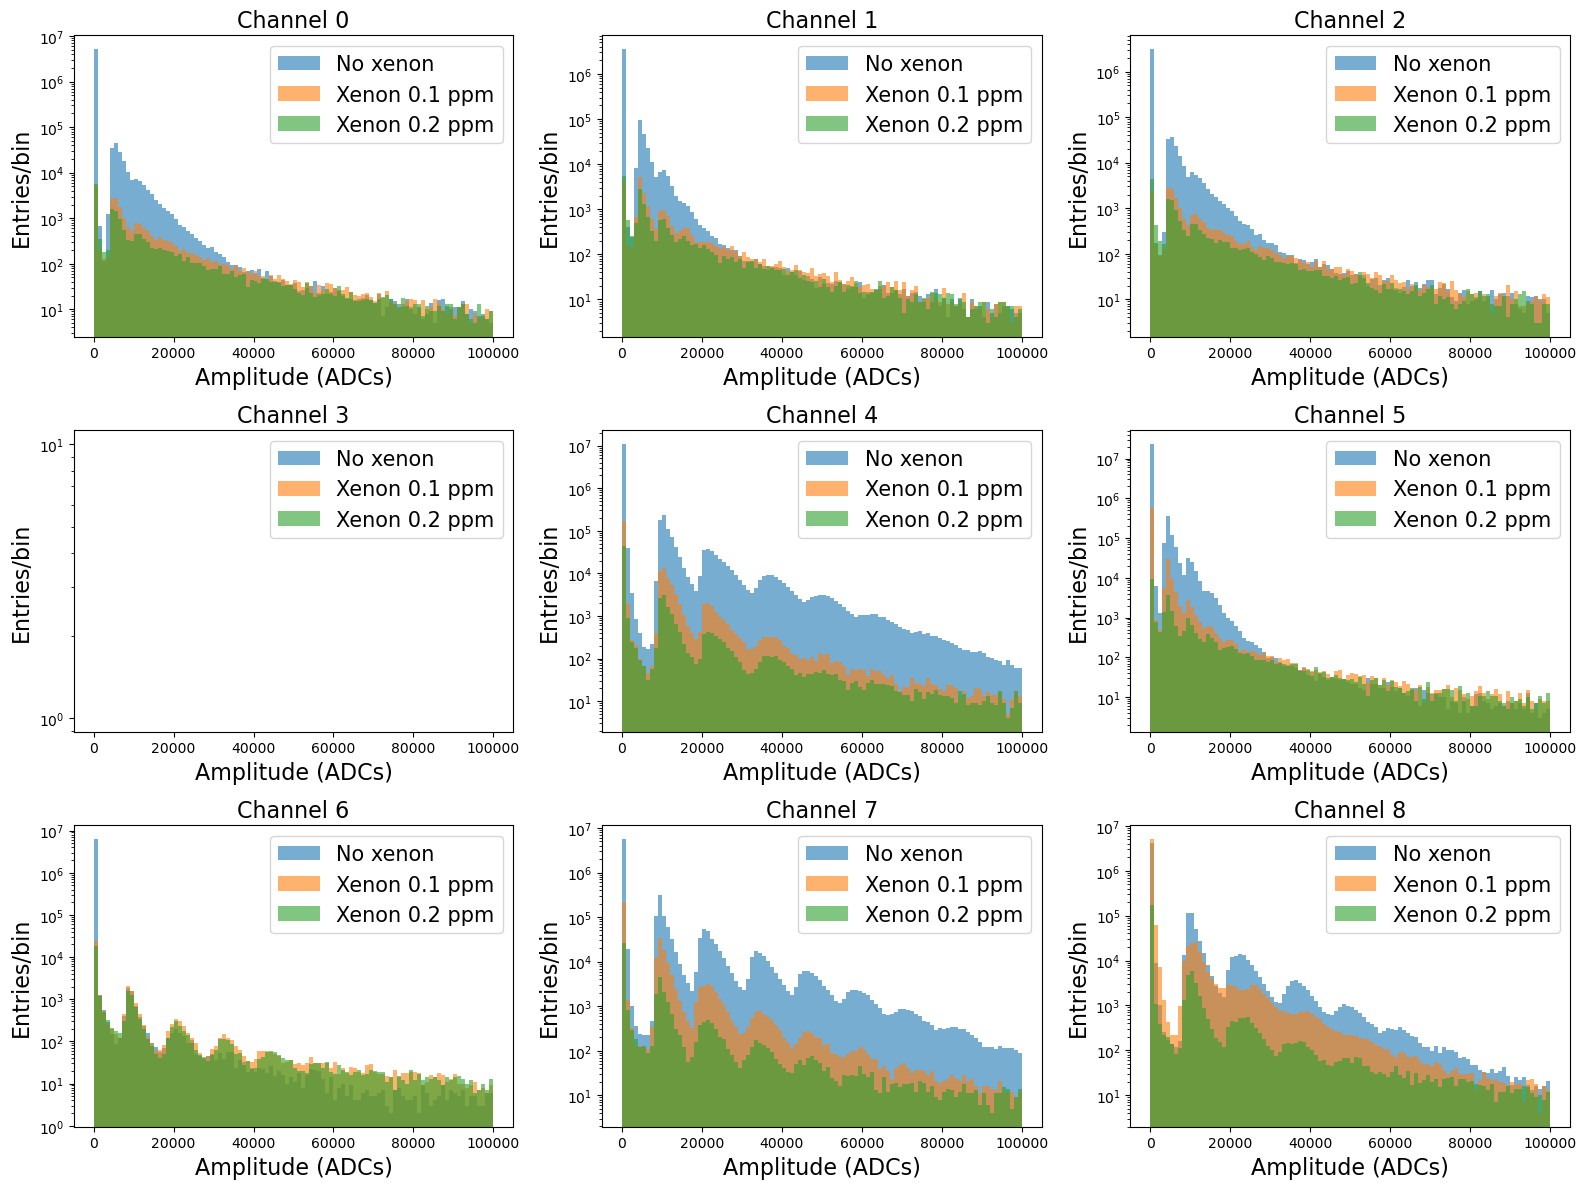

In [88]:
select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_05_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,100000), log=True, label=f'No xenon', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,100000), log=True, label=f'Xenon 0.1 ppm', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,100000), log=True, label=f'Xenon 0.2 ppm', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/3356057327.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


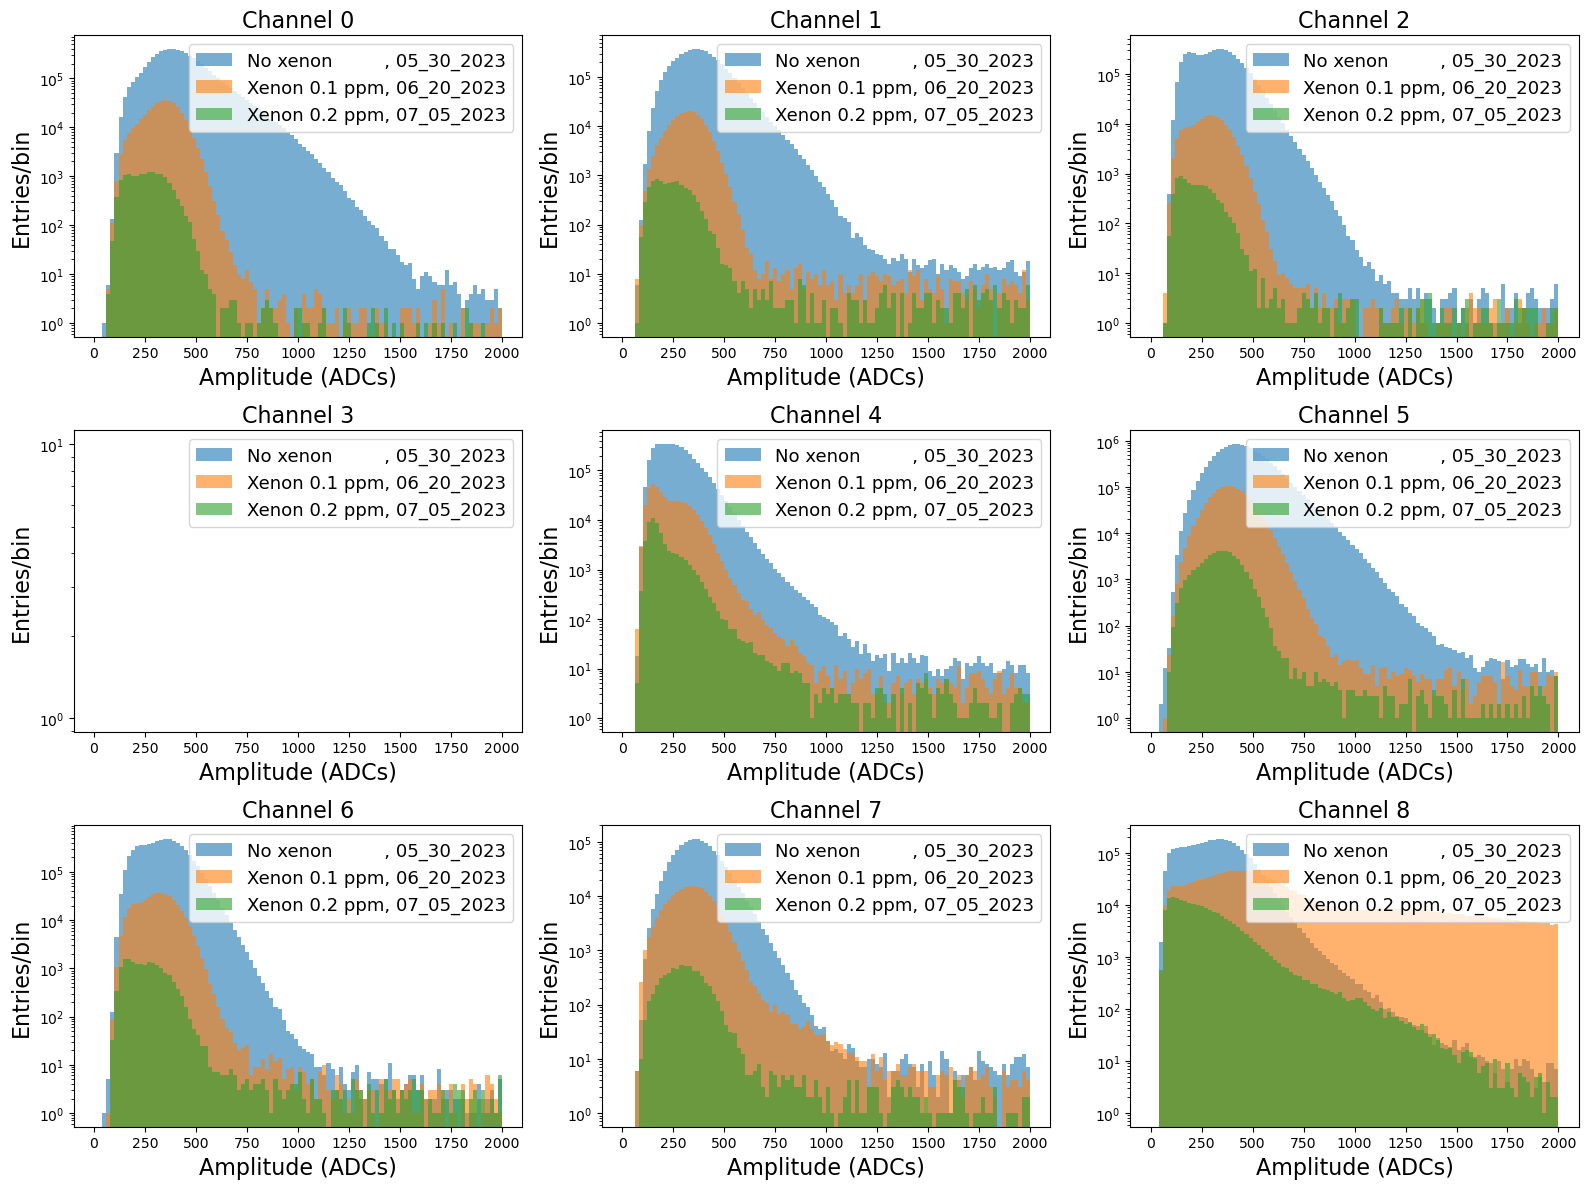

In [99]:
select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_05_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_all_channels_dict[select_date1][k], bins=100, range=(0,2000), log=True, label=f'No xenon         , {select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date2][k], bins=100, range=(0,2000), log=True, label=f'Xenon 0.1 ppm, {select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date3][k], bins=100, range=(0,2000), log=True, label=f'Xenon 0.2 ppm, {select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=13)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/2830512738.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


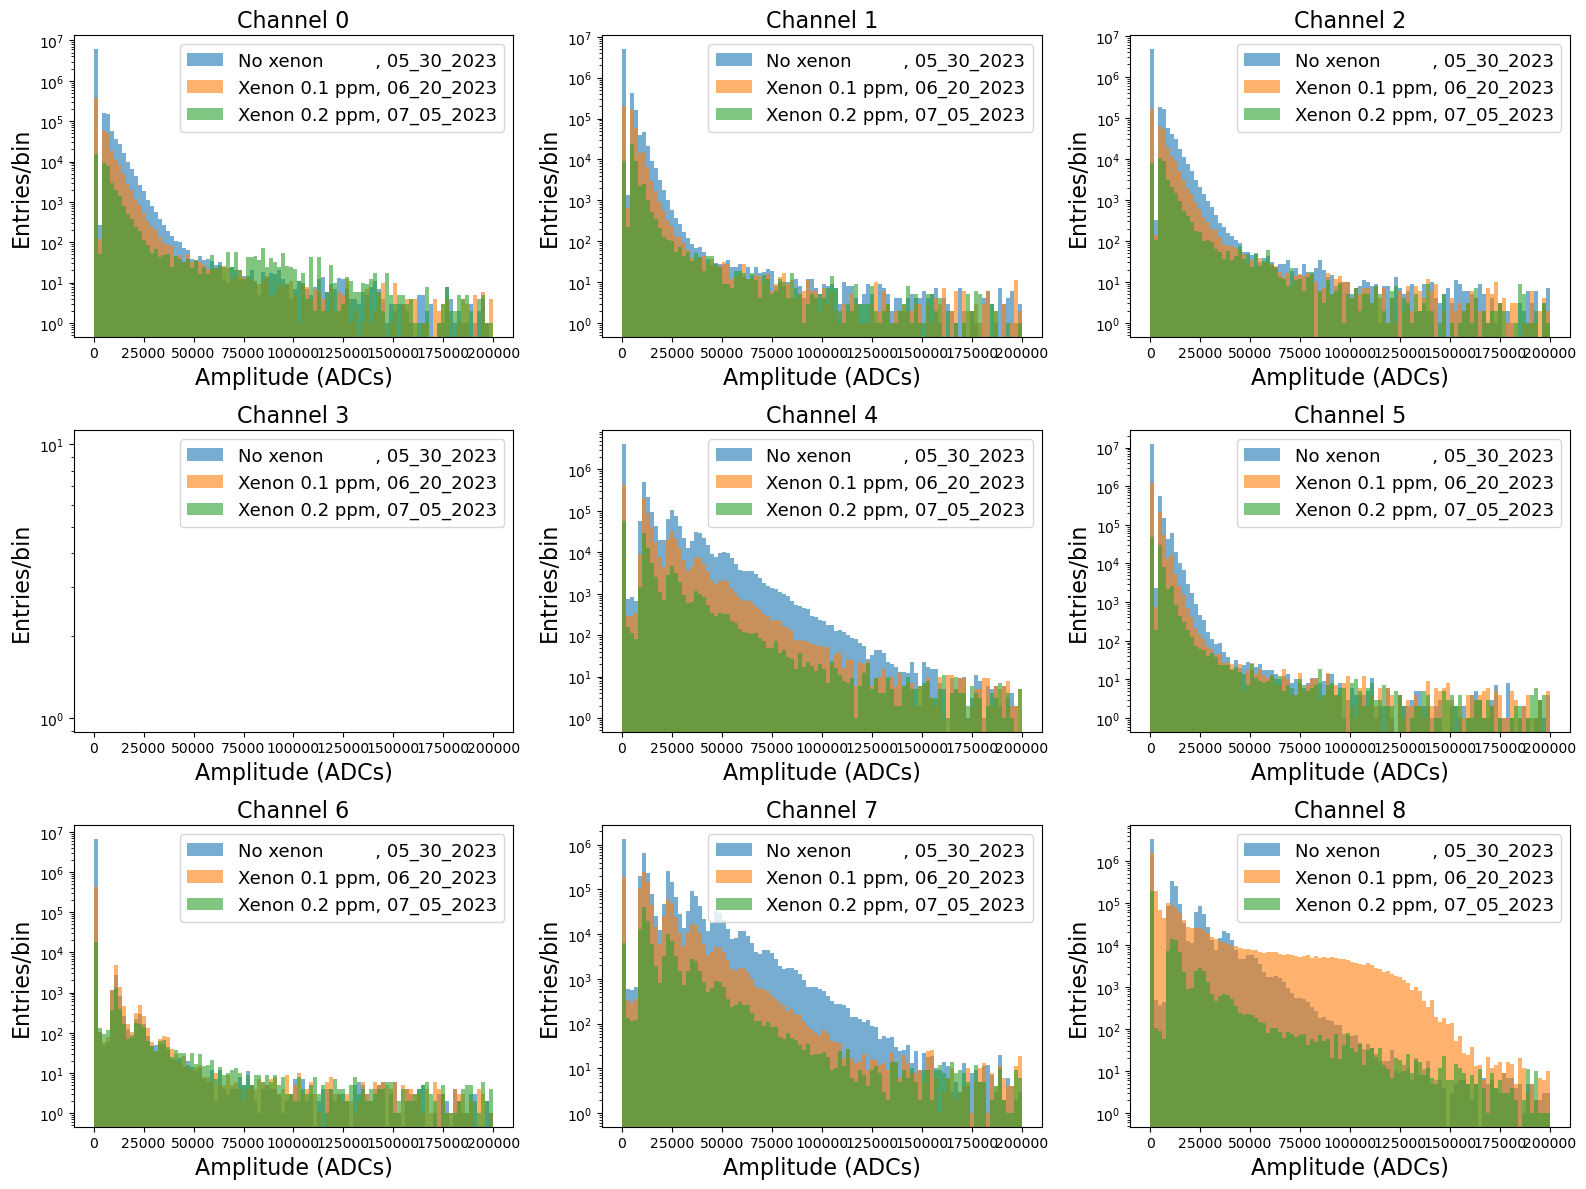

In [100]:
select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_05_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_all_channels_dict[select_date1][k], bins=100, range=(0,200000), log=True, label=f'No xenon         , {select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date2][k], bins=100, range=(0,200000), log=True, label=f'Xenon 0.1 ppm, {select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date3][k], bins=100, range=(0,200000), log=True, label=f'Xenon 0.2 ppm, {select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=13)
plt.tight_layout()
plt.show()

## Compare height and integration

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/3257288933.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


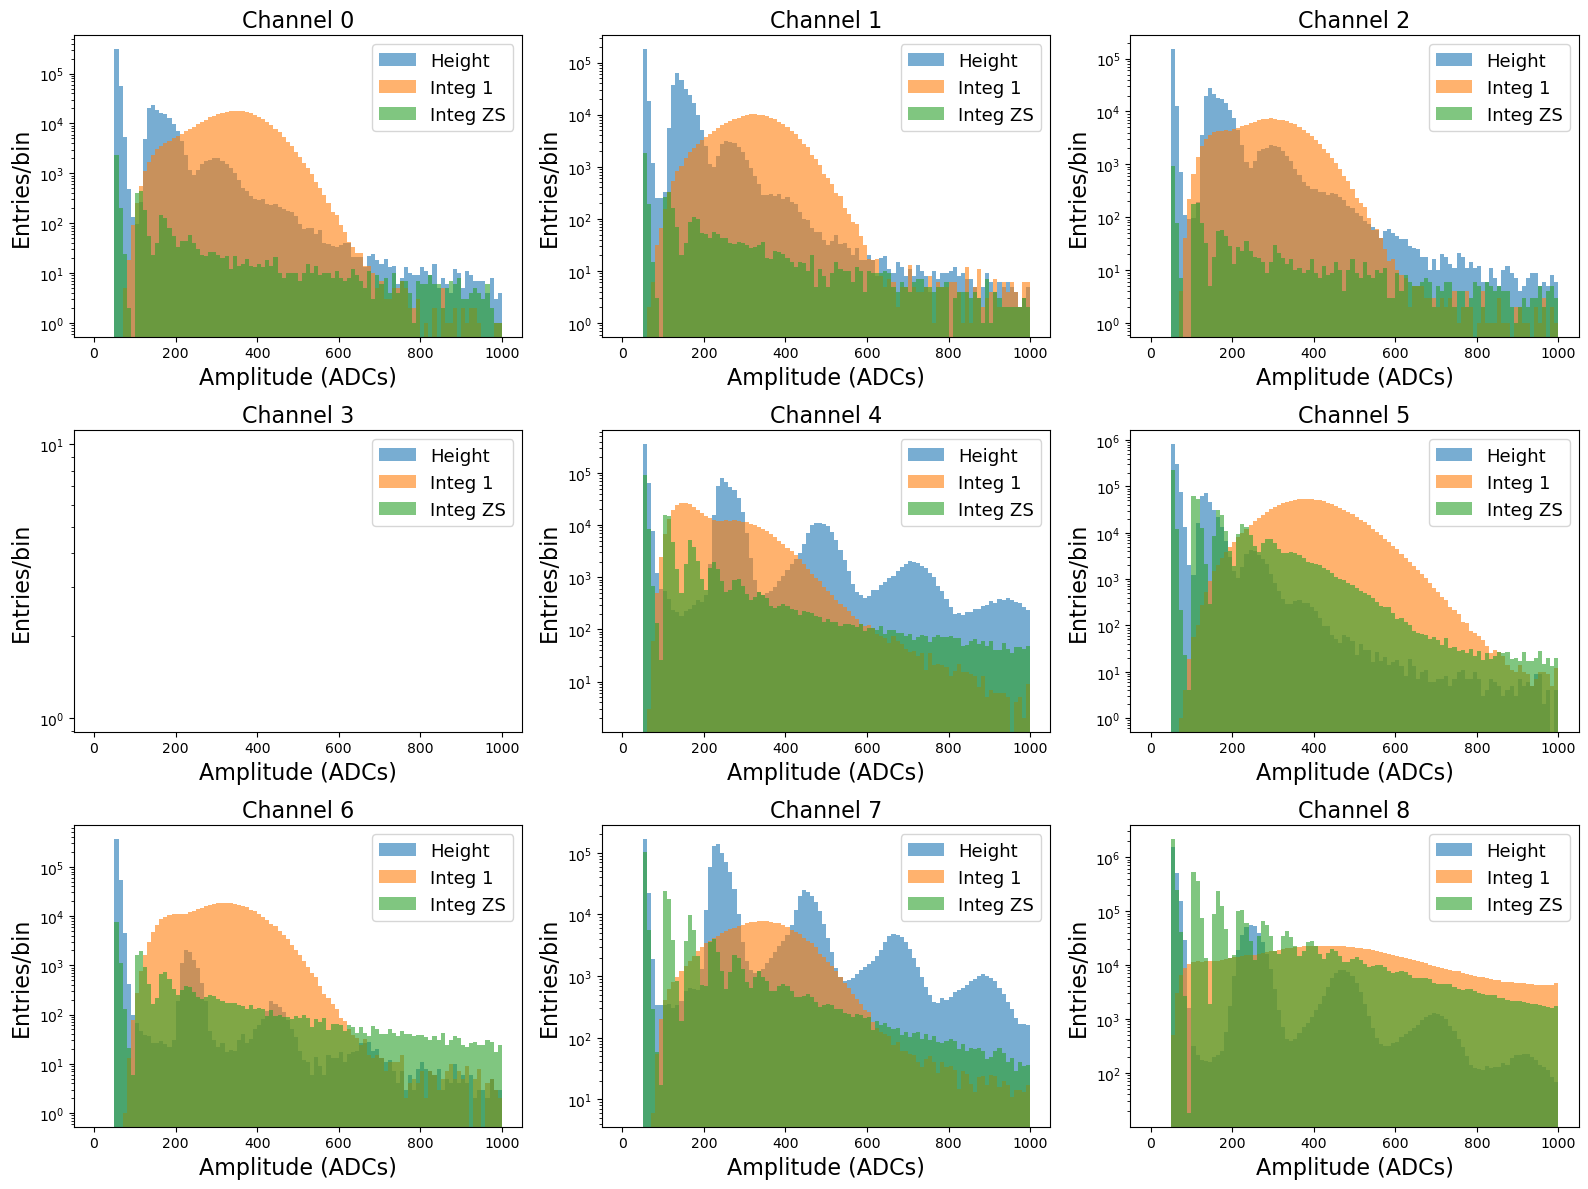

In [102]:
select_date1 = '06_20_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heigh_all_channels_dict  [select_date1][k], bins=100, range=(0,1000), log=True, label=f'Height',   alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict   [select_date1][k], bins=100, range=(0,1000), log=True, label=f'Integ 1',  alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'Integ ZS', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=13)
plt.tight_layout()
plt.show()

/var/folders/w3/6fb22s_13359gnb2nycqzgc80018cj/T/ipykernel_16318/2334544364.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


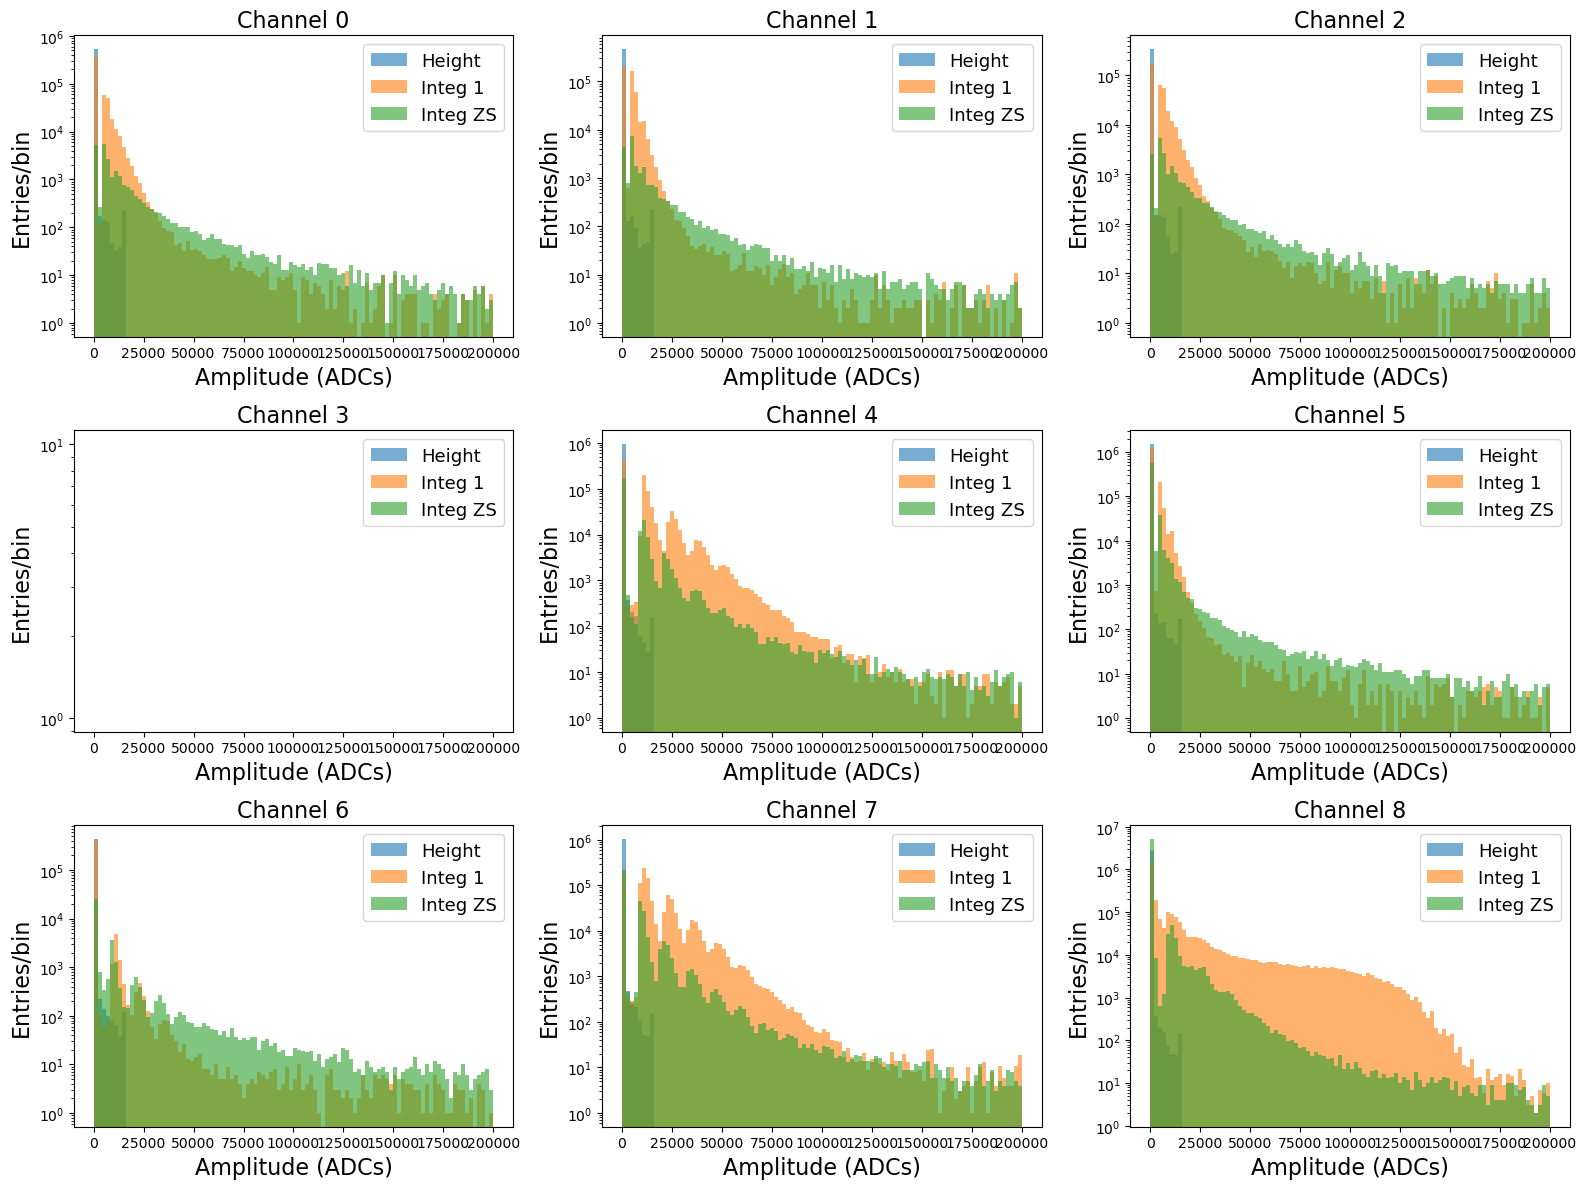

In [104]:
select_date1 = '06_20_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heigh_all_channels_dict  [select_date1][k], bins=100, range=(0,200000), log=True, label=f'Height',   alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict   [select_date1][k], bins=100, range=(0,200000), log=True, label=f'Integ 1',  alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,200000), log=True, label=f'Integ ZS', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=13)
plt.tight_layout()
plt.show()